# Group Assignment 

Analysis of the known SMILES

In [1]:
# Import packages 
import pandas as pd
import seaborn as sns
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
#from rdkit.Chem import Draw
#from rdkit.Chem.Draw import IPythonConsole

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


## Preprocessing

In [2]:
# Read file
original_df = pd.read_csv('tested_molecules_1.csv')

# Split the column
original_df[['SMILES', 'ALDH1_inhibition']] = original_df['SMILES,"ALDH1_inhibition"'].str.split(',', expand=True)
original_df.drop('SMILES,"ALDH1_inhibition"', axis=1, inplace=True)

original_df['ALDH1_inhibition'] = original_df['ALDH1_inhibition'].str.strip('"')

all_descriptors = [desc[0] for desc in Descriptors.descList]

descriptor_data = []
for i, row in original_df.iterrows():
    mol = Chem.MolFromSmiles(row['SMILES'])
    descriptor_values = [getattr(Descriptors, descriptor)(mol) for descriptor in all_descriptors]
    descriptor_data.append(descriptor_values)

descriptor_df = pd.DataFrame(descriptor_data, columns=all_descriptors)
original_df = pd.concat([original_df, descriptor_df], axis=1)

df = original_df.copy()

# The same needs to be done for the test_data

original_df_test = pd.read_csv('tested_molecules_2.csv')

original_df_test[['SMILES', 'ALDH1_inhibition']] = original_df_test['SMILES;ALDH1_inhibition'].str.split(';', expand=True)
original_df_test.drop('SMILES;ALDH1_inhibition', axis=1, inplace=True)

#original_df_test['ALDH1_inhibition'] = original_df['ALDH1_inhibition'].str.strip('"')
X_test_data = original_df_test.copy()


### Adding descriptors

In [3]:
# Get all available descriptors
all_descriptors = [desc[0] for desc in Descriptors.descList]

# Print all descriptors
for descriptor in all_descriptors:
    print(descriptor)

MaxAbsEStateIndex
MaxEStateIndex
MinAbsEStateIndex
MinEStateIndex
qed
MolWt
HeavyAtomMolWt
ExactMolWt
NumValenceElectrons
NumRadicalElectrons
MaxPartialCharge
MinPartialCharge
MaxAbsPartialCharge
MinAbsPartialCharge
FpDensityMorgan1
FpDensityMorgan2
FpDensityMorgan3
BCUT2D_MWHI
BCUT2D_MWLOW
BCUT2D_CHGHI
BCUT2D_CHGLO
BCUT2D_LOGPHI
BCUT2D_LOGPLOW
BCUT2D_MRHI
BCUT2D_MRLOW
AvgIpc
BalabanJ
BertzCT
Chi0
Chi0n
Chi0v
Chi1
Chi1n
Chi1v
Chi2n
Chi2v
Chi3n
Chi3v
Chi4n
Chi4v
HallKierAlpha
Ipc
Kappa1
Kappa2
Kappa3
LabuteASA
PEOE_VSA1
PEOE_VSA10
PEOE_VSA11
PEOE_VSA12
PEOE_VSA13
PEOE_VSA14
PEOE_VSA2
PEOE_VSA3
PEOE_VSA4
PEOE_VSA5
PEOE_VSA6
PEOE_VSA7
PEOE_VSA8
PEOE_VSA9
SMR_VSA1
SMR_VSA10
SMR_VSA2
SMR_VSA3
SMR_VSA4
SMR_VSA5
SMR_VSA6
SMR_VSA7
SMR_VSA8
SMR_VSA9
SlogP_VSA1
SlogP_VSA10
SlogP_VSA11
SlogP_VSA12
SlogP_VSA2
SlogP_VSA3
SlogP_VSA4
SlogP_VSA5
SlogP_VSA6
SlogP_VSA7
SlogP_VSA8
SlogP_VSA9
TPSA
EState_VSA1
EState_VSA10
EState_VSA11
EState_VSA2
EState_VSA3
EState_VSA4
EState_VSA5
EState_VSA6
EState_VSA7

In [4]:
df.head()  # waarom maar 5 rijen?  Pakt wel 209 PCs dus denk dat het goed gaat. 

,SMILES,ALDH1_inhibition,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1,13.083531,13.083531,0.001173,-0.683140,0.520365,463.542,434.310,463.233188,...,0,0,0,0,1,0,0,0,0,0
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1,12.170097,12.170097,0.066966,-0.066966,0.498564,378.457,360.313,378.115047,...,1,0,0,0,0,0,0,0,0,0
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1,10.905837,10.905837,0.016881,-0.016881,0.382043,477.589,444.325,477.260865,...,0,0,0,0,1,0,0,0,0,0
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1,11.562446,11.562446,0.270607,-0.454447,0.795948,330.609,317.505,328.981818,...,0,0,0,0,0,0,0,0,0,0
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1,12.108866,12.108866,0.086947,-3.251317,0.687618,419.553,402.417,419.043204,...,0,1,0,0,0,1,0,1,0,0


In [5]:
df_variables = df.drop(columns=["SMILES", "ALDH1_inhibition"])
df_variables

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.083531,13.083531,0.001173,-0.683140,0.520365,463.542,434.310,463.233188,178,0,...,0,0,0,0,1,0,0,0,0,0
1,12.170097,12.170097,0.066966,-0.066966,0.498564,378.457,360.313,378.115047,136,0,...,1,0,0,0,0,0,0,0,0,0
2,10.905837,10.905837,0.016881,-0.016881,0.382043,477.589,444.325,477.260865,184,0,...,0,0,0,0,1,0,0,0,0,0
3,11.562446,11.562446,0.270607,-0.454447,0.795948,330.609,317.505,328.981818,96,0,...,0,0,0,0,0,0,0,0,0,0
4,12.108866,12.108866,0.086947,-3.251317,0.687618,419.553,402.417,419.043204,140,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.276695,12.276695,0.095308,-0.234165,0.779148,261.301,244.165,261.123369,100,0,...,0,0,0,0,0,0,0,0,0,0
996,8.926724,8.926724,0.197944,0.197944,0.891297,257.293,242.173,257.116427,98,0,...,0,0,0,0,0,0,0,0,0,0
997,10.688087,10.688087,0.166502,-0.368508,0.805927,201.229,190.141,201.090212,76,0,...,0,0,0,0,0,0,0,0,0,0
998,12.603109,12.603109,0.065686,-0.447592,0.644831,392.441,372.281,392.126674,144,0,...,1,0,0,0,0,0,0,0,0,0


### Find correlation

MaxAbsEStateIndex == MaxEStateINdex is removed 


In [6]:
#correlation = df_variables.corr()                            # Calculate correlation

### Te veel variabelen om er een mooi figuur van te maken
#sns.set (rc = {'figure.figsize':(9, 8)})                     # Set size of figure
##sns.heatmap(correlation, cmap="Blues", annot=True)           # Making heatmap
#plt.title('Correlation analysis', fontsize=15);   

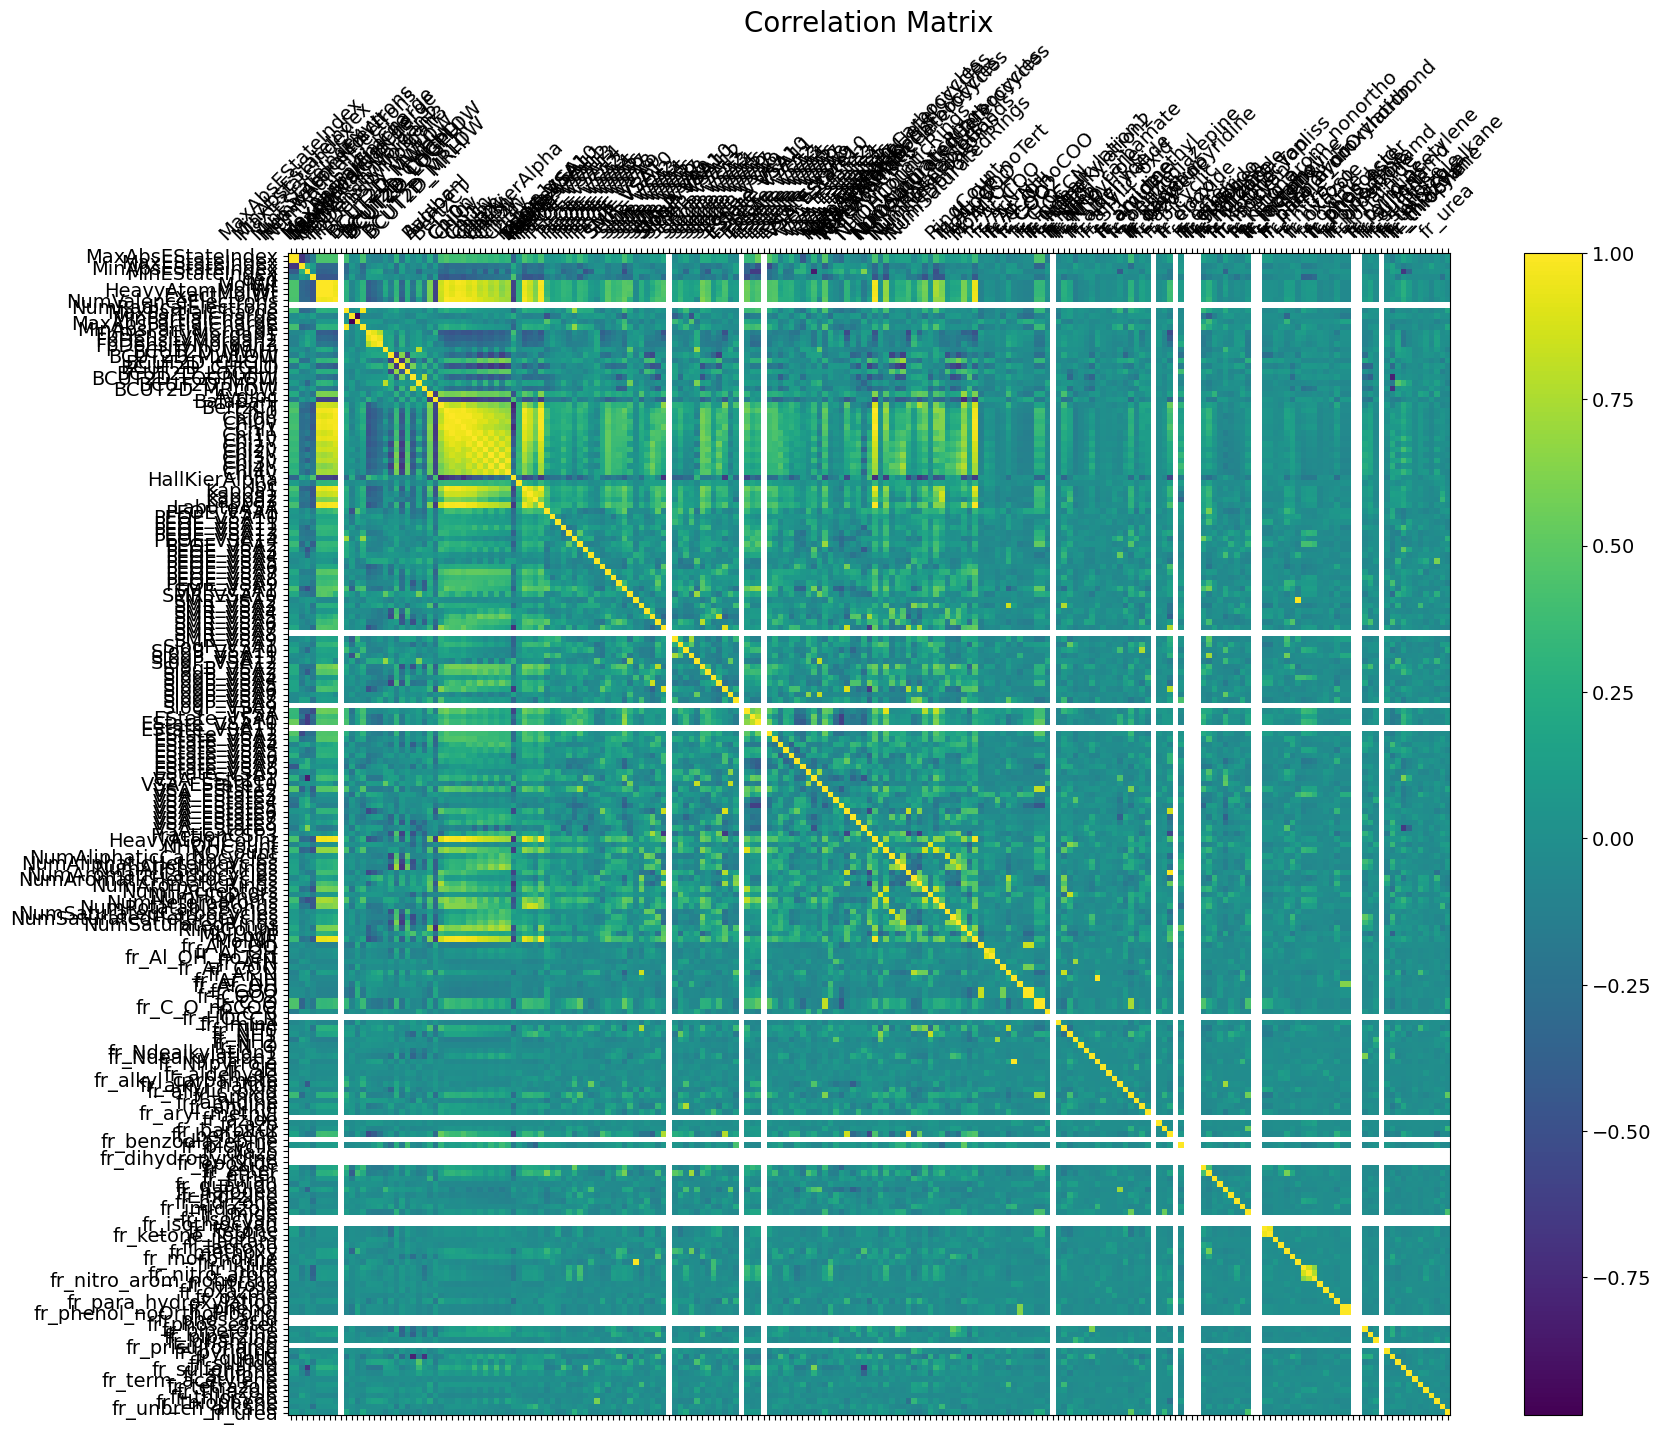

In [7]:
correlation = df_variables.corr()                            # Calculate correlation
f = plt.figure(figsize=(19, 15))
plt.matshow(correlation, fignum=f.number)          

# choose axes range
plt.xticks(range(df_variables.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_variables.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)

cb = plt.colorbar()  
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=20);

In [8]:
new_df_variables = df_variables.copy()
corr_matrix = new_df_variables.corr().abs()
corr_matrix
mask = np.triu(np.ones(corr_matrix.shape, dtype=bool), k=1)
mask

# Select upper triangle of correlation matrix using the boolean mask
upper = corr_matrix.where(mask)

# Find index of columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop the columns
new_df_variables.drop(columns=to_drop, inplace=True)
new_df_variables



,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.083531,0.001173,-0.683140,0.520365,463.542,0,0.249868,-0.496477,1.088235,16.465857,...,0,0,0,0,1,0,0,0,0,0
1,12.170097,0.066966,-0.066966,0.498564,378.457,0,0.230353,-0.467476,1.111111,32.166556,...,1,0,0,0,0,0,0,0,0,0
2,10.905837,0.016881,-0.016881,0.382043,477.589,0,0.219930,-0.492903,1.228571,16.492058,...,0,0,0,0,1,0,0,0,0,0
3,11.562446,0.270607,-0.454447,0.795948,330.609,0,0.351723,-0.421732,1.333333,79.918731,...,0,0,0,0,0,0,0,0,0,0
4,12.108866,0.086947,-3.251317,0.687618,419.553,0,0.231765,-0.301646,1.296296,32.233291,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.276695,0.095308,-0.234165,0.779148,261.301,0,0.292020,-0.496766,1.210526,16.465312,...,0,0,0,0,0,0,0,0,0,0
996,8.926724,0.197944,0.197944,0.891297,257.293,0,0.235725,-0.483868,1.473684,16.491677,...,0,0,0,0,0,0,0,0,0,0
997,10.688087,0.166502,-0.368508,0.805927,201.229,0,0.236896,-0.368122,1.333333,16.147009,...,0,0,0,0,0,0,0,0,0,0
998,12.603109,0.065686,-0.447592,0.644831,392.441,0,0.331704,-0.359541,1.296296,32.166556,...,1,0,0,0,0,0,0,0,0,0


In [9]:
df_for_stv = new_df_variables.copy()
# Calculate the standard deviation for each column
std_dev = df_for_stv.std()
threshold = 0.1

columns_to_drop = std_dev[std_dev < threshold].index

# Drop the columns with zero standard deviation from df_variables
df_for_stv.drop(columns=columns_to_drop, inplace=True)
df_for_stv

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,FpDensityMorgan1,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,...,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.083531,0.001173,-0.683140,0.520365,463.542,1.088235,16.465857,10.012387,2.277377,-2.329164,...,0,0,0,0,0,1,0,0,0,0
1,12.170097,0.066966,-0.066966,0.498564,378.457,1.111111,32.166556,10.202245,2.140429,-2.083839,...,1,0,1,0,0,0,0,0,0,0
2,10.905837,0.016881,-0.016881,0.382043,477.589,1.228571,16.492058,9.989823,2.359046,-2.317898,...,1,1,0,0,0,1,0,0,0,0
3,11.562446,0.270607,-0.454447,0.795948,330.609,1.333333,79.918731,10.173315,2.116608,-2.205938,...,0,0,0,0,0,0,0,0,0,0
4,12.108866,0.086947,-3.251317,0.687618,419.553,1.296296,32.233291,10.071048,2.259832,-2.158781,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.276695,0.095308,-0.234165,0.779148,261.301,1.210526,16.465312,10.223467,2.444682,-2.140576,...,0,1,0,0,0,0,0,0,0,0
996,8.926724,0.197944,0.197944,0.891297,257.293,1.473684,16.491677,10.220307,2.119409,-2.033672,...,0,0,0,0,0,0,0,0,0,0
997,10.688087,0.166502,-0.368508,0.805927,201.229,1.333333,16.147009,10.162385,2.020008,-1.955677,...,0,0,0,0,0,0,0,0,0,0
998,12.603109,0.065686,-0.447592,0.644831,392.441,1.296296,32.166556,10.351430,2.213046,-2.120548,...,0,0,1,0,0,0,0,0,0,0


In [56]:
df_variables_with_ALD = df.drop(columns=["SMILES"])
df_variables_with_ALD['ALDH1_inhibition'] = pd.to_numeric(df_variables_with_ALD['ALDH1_inhibition'])
column_type = df_variables_with_ALD['ALDH1_inhibition'].dtype
print(column_type)

first_column = df_variables_with_ALD.iloc[:, 0]  # Select the first column
correlations = df_variables_with_ALD.iloc[:, 1:].corrwith(first_column)
sorted_correlations = correlations.abs().sort_values(ascending=False)
for column_name, correlation in sorted_correlations.items():
    print("Column:", column_name)
    print("Absolute Correlation:", correlation)
    print()

#from sklearn.feature_selection import SelectKBest, f_classif
#k = 40
#selector = SelectKBest(score_func=f_classif, k=k)
#X_selected = selector.fit_transform(df_for_stv, df["ALDH1_inhibition"])
#selected_feature_indices = selector.get_support(indices=True)
#selected_feature_names = df_for_stv.columns[selected_feature_indices]
#df_selected = df_for_stv[selected_feature_names]

#df_selected
#feature_scores = selector.scores_
#feature_scores_df = pd.DataFrame({'Feature': df_for_stv.columns, 'Score': feature_scores})
#feature_scores_df = feature_scores_df.sort_values('Score', ascending=False)
#print(feature_scores_df.head(k))

int64
Column: SMR_VSA10
Absolute Correlation: 0.22022993389705414

Column: HeavyAtomMolWt
Absolute Correlation: 0.1520441070029115

Column: Chi3v
Absolute Correlation: 0.14847487904098924

Column: Chi4v
Absolute Correlation: 0.14824162063844507

Column: MolWt
Absolute Correlation: 0.14665299734950818

Column: ExactMolWt
Absolute Correlation: 0.1465274986854765

Column: qed
Absolute Correlation: 0.14624013300062502

Column: BCUT2D_LOGPHI
Absolute Correlation: 0.1456004946522101

Column: MolMR
Absolute Correlation: 0.14210994877220404

Column: LabuteASA
Absolute Correlation: 0.13929451138967378

Column: Chi1v
Absolute Correlation: 0.13734207096791318

Column: BCUT2D_MRHI
Absolute Correlation: 0.13628741388703375

Column: Chi2v
Absolute Correlation: 0.13575150489837473

Column: Chi0v
Absolute Correlation: 0.1348635399961084

Column: BertzCT
Absolute Correlation: 0.13254822084198262

Column: HeavyAtomCount
Absolute Correlation: 0.12755595862202676

Column: Chi1
Absolute Correlation: 0.1271

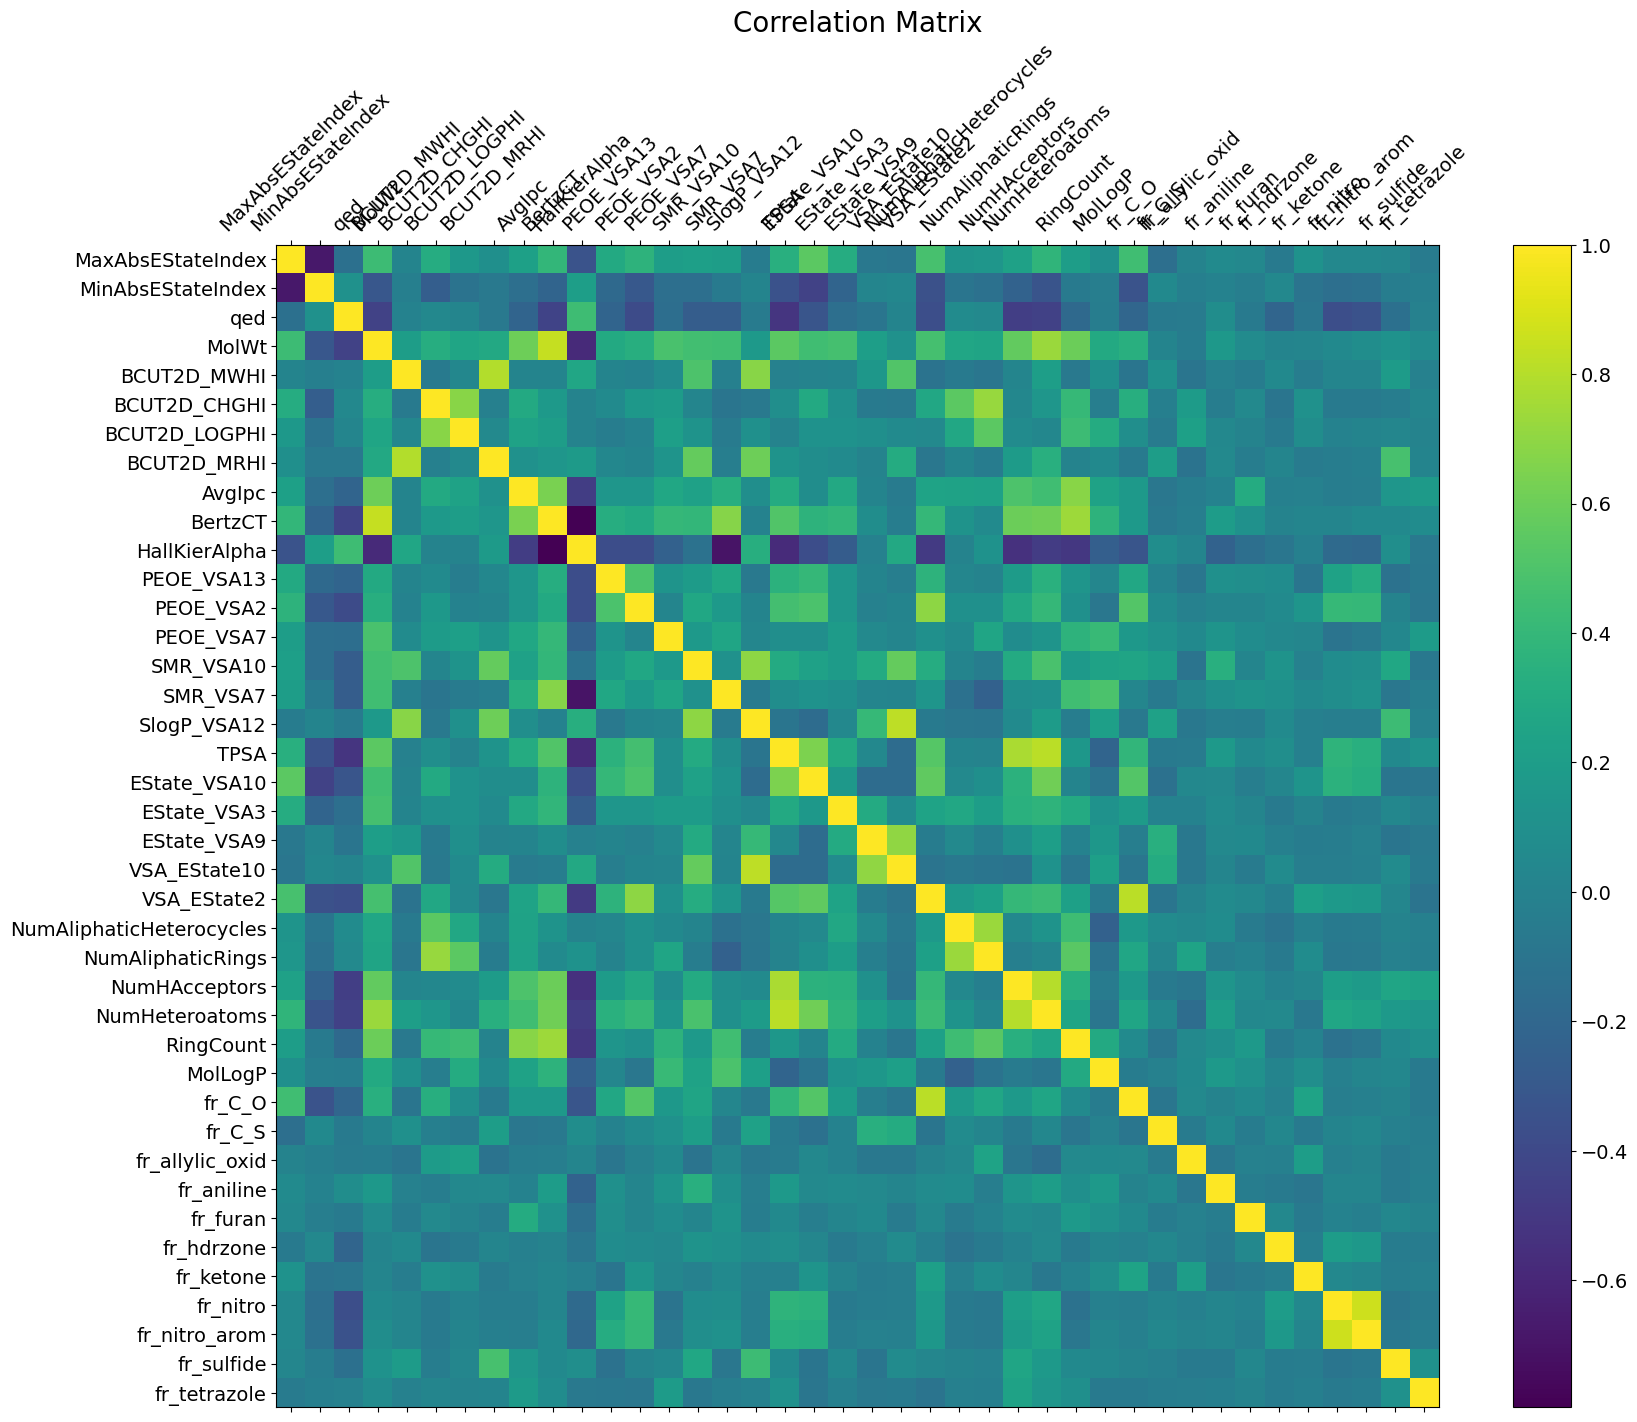

In [11]:
correlation = df_selected.corr()                            # Calculate correlation
f = plt.figure(figsize=(19, 15))
plt.matshow(correlation, fignum=f.number)          

# choose axes range
plt.xticks(range(df_selected.select_dtypes(['number']).shape[1]), df_selected.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_selected.select_dtypes(['number']).shape[1]), df_selected.select_dtypes(['number']).columns, fontsize=14)

cb = plt.colorbar()  
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=20);

### Check missing values 


In [12]:
missing_values = df_selected.isna().sum().sum()     
if missing_values > 0: 
   print('Remove missing values')
else: 
   print('No missing_values')

No missing_values


### Check duplicates

In [13]:
check_duplicate = df_selected.duplicated()
if check_duplicate.any():
    print("Duplicates exist in the DataFrame.")
else:
    print("All GOOD!")

All GOOD!


## Principal Component Analysis (PCA)

In [14]:
# Scaling the data 
df_copied = df_selected.copy()
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_copied)

In [15]:
# Create principal components
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(df_pca.shape[1])]
df_pca_converted = pd.DataFrame(df_pca, columns=component_names)

df_pca_converted.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,0.595530,-0.224054,-0.315922,-0.335588,0.483581,-0.106065,0.113118,0.216353,0.211803,-0.410536,...,-0.043895,-0.015297,0.021727,-0.018607,-0.005095,-0.004311,0.004304,-0.000438,-0.028497,0.001579
1,0.267246,0.285293,-0.071468,-0.323873,0.299247,-0.055736,-0.419764,-0.147166,-0.088259,0.193595,...,-0.004426,-0.000856,-0.003962,0.012318,-0.013535,-0.024316,0.008802,-0.030134,0.006530,0.013371
2,0.403709,-0.058435,-0.439923,-0.806250,0.621102,0.145025,0.133324,-0.068888,-0.043875,-0.454115,...,-0.023169,-0.031431,0.006871,-0.010374,0.051028,0.022668,0.017942,0.022706,0.000988,0.016278
3,-0.459823,0.785678,0.023556,0.176691,-0.319213,-0.131082,0.001624,0.048599,-0.114075,-0.113033,...,0.097015,0.058729,-0.032000,-0.010482,0.006531,0.021212,0.017304,-0.003959,-0.009981,0.005900
4,0.360736,0.372662,-0.277469,-0.002542,-0.097682,-0.081011,0.148192,0.260708,-0.046141,0.090293,...,-0.129332,0.025240,0.014378,0.037727,-0.002122,0.010068,-0.061139,0.043699,0.015905,-0.012365


In [16]:
# Explained variance
evr = pca.explained_variance_ratio_
print(evr*100)
    
# Cumaltive Variance
cv = np.cumsum(evr)
print(cv)                                # NEED 46 Principal components for 90% , 11 for 60% 

[22.13372559 10.3850724   8.67010198  7.45723543  5.4476638   5.09165341
  4.36243688  3.79385895  3.4636416   3.2391946   2.98253467  2.7679167
  2.44808141  2.14967731  2.00259747  1.65886194  1.51361765  1.28158236
  1.18955674  0.97285288  0.83007215  0.79671761  0.73996934  0.67961205
  0.63055085  0.49641589  0.47314781  0.37913268  0.35519484  0.29921895
  0.24274247  0.22803406  0.22577243  0.16066817  0.12068513  0.10545322
  0.09428191  0.06205109  0.04596482  0.02245072]
[0.22133726 0.32518798 0.411889   0.48646135 0.54093799 0.59185453
 0.6354789  0.67341748 0.7080539  0.74044585 0.77027119 0.79795036
 0.82243117 0.84392795 0.86395392 0.88054254 0.89567872 0.90849454
 0.92039011 0.93011864 0.93841936 0.94638654 0.95378623 0.96058235
 0.96688786 0.97185202 0.9765835  0.98037482 0.98392677 0.98691896
 0.98934638 0.99162673 0.99388445 0.99549113 0.99669798 0.99775251
 0.99869533 0.99931584 0.99977549 1.        ]


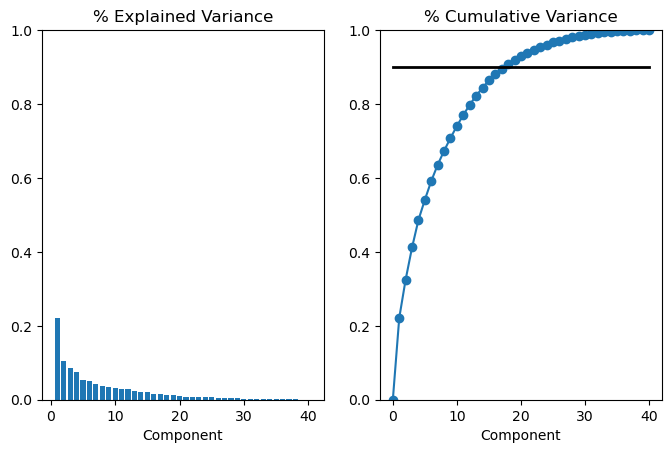

In [17]:
# Create figure
fig, axs = plt.subplots(1, 2)
n = pca.n_components_
grid = np.arange(1, n + 1)

# Explained variance
axs[0].bar(grid, evr)
axs[0].set(
    xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
)

# Cumulative Variance
axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
axs[1].plot([0, n], [0.9, 0.9], color='k', linestyle='-', linewidth=2)
axs[1].set(
    xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
)
        
# Set up figure
fig.set(figwidth=8, dpi=100);

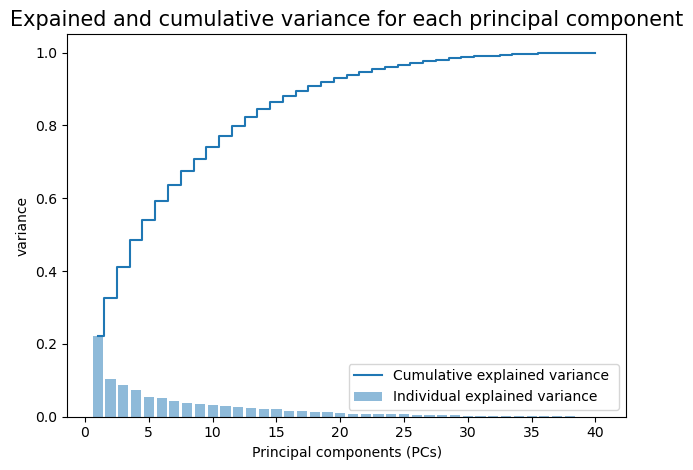

In [18]:
# Summery figure explained and cumulative variance
plt.bar(range(1,len(evr)+1), evr, alpha=0.5, align='center', label='Individual explained variance ')    # explained variance
plt.step(range(1,len(cv)+1), cv, where='mid',label='Cumulative explained variance ')       # Cumulative explained variance

plt.xlabel('Principal components (PCs)')
plt.ylabel('variance')
plt.title('Expained and cumulative variance for each principal component', fontsize=15)

plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [32]:
#X_test = X_test_data['SMILES']
selected_descriptors = [desc for desc in all_descriptors if desc in df_selected.columns]
descriptor_data = []
for i, row in X_test_data.iterrows():
    mol = Chem.MolFromSmiles(row['SMILES'])
    descriptor_values = [getattr(Descriptors, descriptor)(mol) for descriptor in selected_descriptors]
    descriptor_data.append(descriptor_values)

descriptor_df = pd.DataFrame(descriptor_data, columns=selected_descriptors)
X_test_all_columns = pd.concat([X_test_data, descriptor_df], axis=1)



X_test = X_test_all_columns.drop(columns=["SMILES", "ALDH1_inhibition"])
y_test = X_test_data['ALDH1_inhibition']
X_train = df_pca
y_train = original_df['ALDH1_inhibition']

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.425


C:\Users\20213276\.conda\envs\my-rdkit-env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


### Loadings

In [20]:
loadings = pd.DataFrame(
   pca.components_.T,                     # transpose the pca matrix 
   columns=component_names,               # so the columns are the principal components
   index=df_selected.columns,                      # and the rows are the original features
)
loadings      

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
MaxAbsEStateIndex,0.220548,-0.110809,-0.067006,0.191151,-0.111803,-0.109018,-0.261440,0.126162,-0.193774,-0.329601,...,-0.036141,-0.051016,0.030981,-0.016230,0.035708,0.003981,0.043167,-0.024270,-0.017097,0.002042
MinAbsEStateIndex,-0.142012,0.072598,0.016108,-0.179589,0.012133,0.072115,0.140979,-0.075376,0.190586,0.371499,...,-0.019333,-0.059716,0.001785,-0.018235,0.044261,0.006613,0.026442,-0.018558,-0.018823,-0.001724
qed,-0.263216,-0.038368,-0.315305,0.123014,-0.260513,-0.138442,-0.018703,0.326119,-0.176373,-0.124368,...,0.007250,-0.016034,0.056101,-0.007262,0.006542,0.031879,0.003863,-0.006064,0.001050,0.005090
MolWt,0.322683,0.092561,-0.128143,-0.080214,-0.038525,0.024385,0.035195,-0.015950,0.014105,-0.081527,...,-0.184389,0.068653,0.371082,0.083524,-0.010846,0.149683,0.151181,-0.008710,-0.215989,0.231469
BCUT2D_MWHI,0.020190,0.261318,0.022589,0.098769,-0.035835,-0.003284,-0.021972,0.034385,-0.173535,-0.065880,...,0.213818,0.061814,-0.177728,-0.297756,-0.077508,0.327398,0.232705,-0.121267,0.117093,-0.108452
BCUT2D_CHGHI,0.103777,-0.108069,-0.278679,0.202599,-0.017665,0.275639,0.069173,-0.010478,-0.178532,-0.000200,...,0.091503,-0.339940,-0.156847,-0.032011,-0.000490,0.094977,-0.051749,0.088929,-0.021193,0.039215
BCUT2D_LOGPHI,0.053250,0.014548,-0.173146,0.053159,-0.045013,0.168803,0.070095,-0.025423,-0.166313,0.001545,...,-0.165335,0.533043,0.235275,-0.017453,-0.094409,-0.173575,0.052759,-0.205086,0.053582,-0.014629
BCUT2D_MRHI,0.048591,0.238134,-0.010958,0.086517,0.074483,-0.037135,-0.048876,0.119023,-0.173249,0.029885,...,0.140478,-0.095220,0.015540,0.354463,0.085436,-0.511113,-0.244244,0.183420,-0.165185,0.150266
AvgIpc,0.256477,0.057210,-0.269306,-0.241180,0.143023,0.130828,-0.048007,-0.064730,-0.068222,0.047593,...,0.158584,0.149435,-0.023208,0.047063,0.075657,0.019902,0.030300,-0.029436,-0.018001,-0.013565
BertzCT,0.300644,0.030115,-0.100320,-0.268638,-0.063956,-0.054457,-0.011158,-0.006751,-0.013012,0.005205,...,0.112277,0.057825,0.009888,-0.117692,0.043294,-0.135648,0.168262,0.491406,0.274790,-0.480698


In [21]:
def plot_loadings(PC_1, PC_2):
    labels = loadings.index
    sns.set_style('white')
    sns.scatterplot(data=loadings, x=PC_1, y=PC_2, hue=labels, palette = 'Paired')

    plt.axhline(y=0, color='gray', linestyle='dotted')    
    plt.axvline(x=0, color='gray', linestyle='dotted')
    plt.axline((-0.2, -0.2), slope = 1,color ='r', linestyle = 'dotted')

    plt.legend(ncol =5, title = 'Variables', loc='center left', bbox_to_anchor=(1.0, 0.5))

Text(0.5, 1.0, 'Loadings principal components 1 and 2')

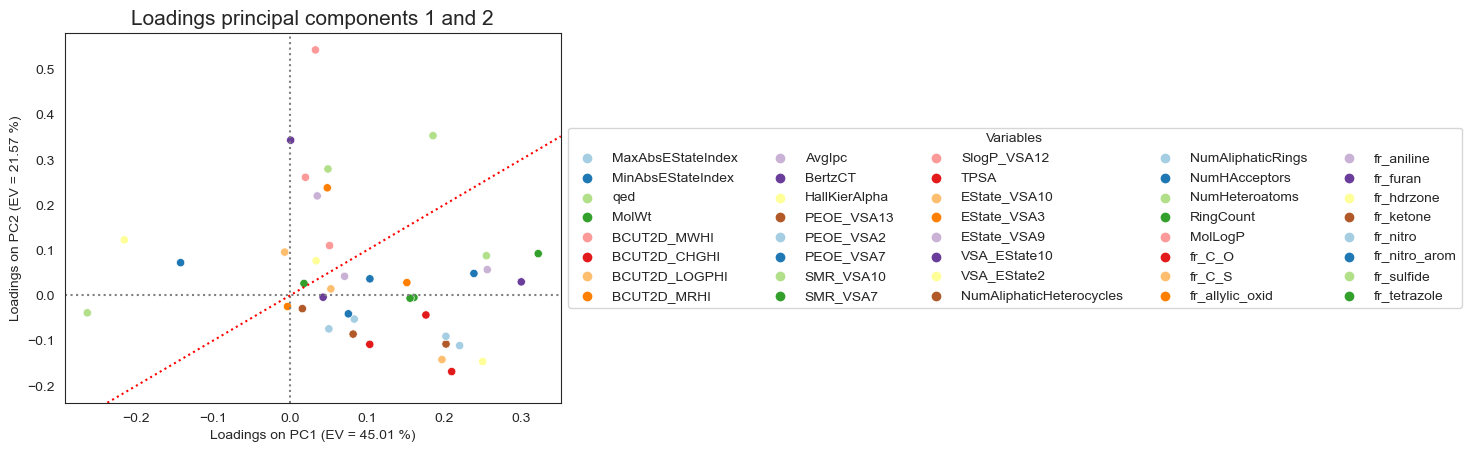

In [22]:
plot_loadings(PC_1 ='PC1', PC_2= 'PC2')               # IS ZO NIETS ZICHTBAAR< Worden te veel variabelen meegenomen. 

plt.xlabel('Loadings on PC1 (EV = 45.01 %)')
plt.ylabel('Loadings on PC2 (EV = 21.57 %)')
plt.title('Loadings principal components 1 and 2', fontsize = 15)

### Score plots 

In [23]:
def plot_scores(label,PC_1, PC_2):
    labels = original_df[label]
    sns.set_style('white')
    sns.scatterplot(x=df_pca[:, PC_1], y=df_pca[:, PC_2], hue=labels, palette= 'bright')

    plt.axhline(y=0, color='gray', linestyle='dotted')    
    plt.axvline(x=0, color='gray', linestyle='dotted')

    plt.legend(loc= 'best', ncol =2, title = label)

In [24]:
print(df_pca)

[[ 5.95529577e-01 -2.24054355e-01 -3.15922021e-01 ... -4.38403310e-04
  -2.84966206e-02  1.57943144e-03]
 [ 2.67245582e-01  2.85292973e-01 -7.14675720e-02 ... -3.01336010e-02
   6.53026803e-03  1.33709896e-02]
 [ 4.03708800e-01 -5.84351442e-02 -4.39923062e-01 ...  2.27056967e-02
   9.87528615e-04  1.62783709e-02]
 ...
 [-6.95504428e-01 -2.83672763e-01  1.55085611e-01 ...  6.10513920e-03
   2.67055994e-02 -6.04664711e-03]
 [ 5.65415958e-01  2.06549467e-01  4.74868964e-02 ...  6.41231238e-03
   1.70645735e-02 -9.18900362e-03]
 [ 3.41404882e-01  3.69419677e-02  6.54392707e-02 ... -7.56373266e-04
  -9.76422216e-03 -2.95947485e-03]]


Text(0.5, 1.0, 'Scores separated by ALDH1 inhibition')

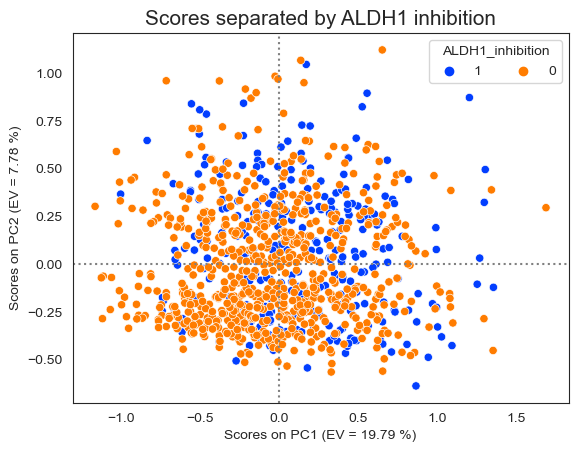

In [25]:
plot_scores(label= 'ALDH1_inhibition', PC_1= 0 , PC_2 = 1)

plt.xlabel('Scores on PC1 (EV = 19.79 %)')
plt.ylabel('Scores on PC2 (EV = 7.78 %)')
plt.title('Scores separated by ALDH1 inhibition', fontsize=15)

Text(0.5, 1.0, 'Scores separated by ALDH1 inhibition')

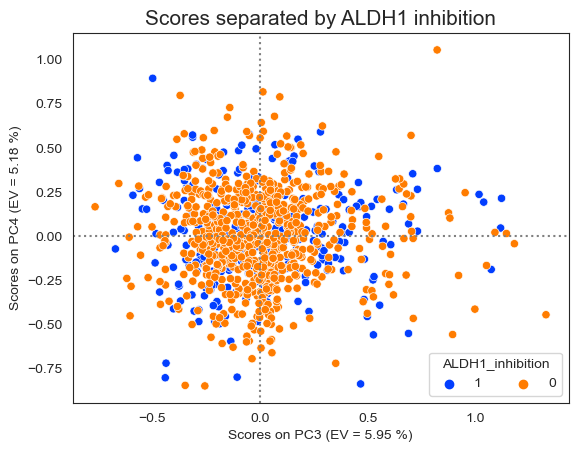

In [26]:
plot_scores(label= 'ALDH1_inhibition', PC_1= 2 , PC_2 = 3)

plt.xlabel('Scores on PC3 (EV = 5.95 %)')
plt.ylabel('Scores on PC4 (EV = 5.18 %)')
plt.title('Scores separated by ALDH1 inhibition', fontsize=15)

Text(0.5, 1.0, 'Scores separated by ALDH1 inhibition')

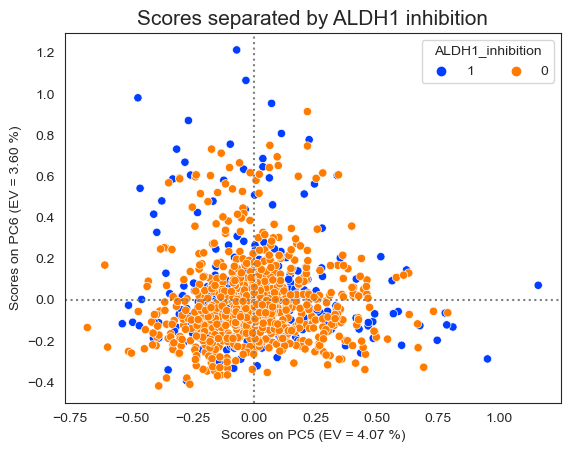

In [27]:
plot_scores(label= 'ALDH1_inhibition', PC_1= 4 , PC_2 = 5)

plt.xlabel('Scores on PC5 (EV = 4.07 %)')
plt.ylabel('Scores on PC6 (EV = 3.60 %)')
plt.title('Scores separated by ALDH1 inhibition', fontsize=15)

Text(0.5, 1.0, 'Scores separated by ALDH1 inhibition')

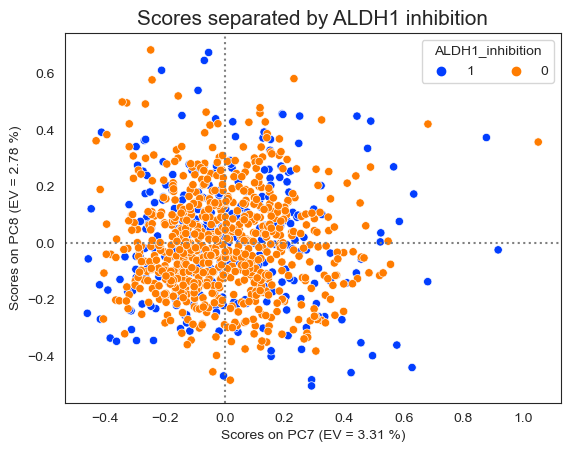

In [28]:
plot_scores(label= 'ALDH1_inhibition', PC_1= 6 , PC_2 = 7)

plt.xlabel('Scores on PC7 (EV = 3.31 %)')
plt.ylabel('Scores on PC8 (EV = 2.78 %)')
plt.title('Scores separated by ALDH1 inhibition', fontsize=15)

Text(0.5, 1.0, 'Scores separated by ALDH1 inhibition')

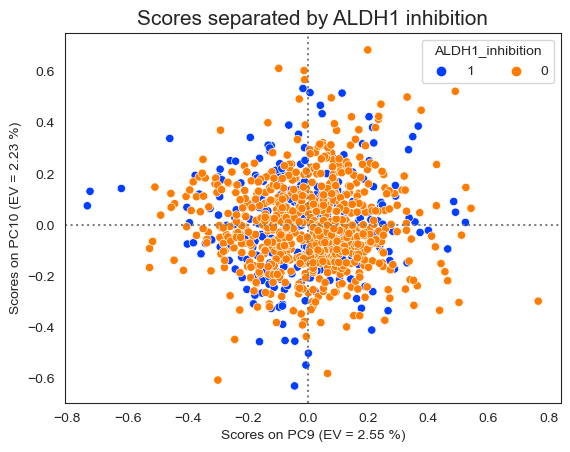

In [29]:
plot_scores(label= 'ALDH1_inhibition', PC_1= 8 , PC_2 = 9)

plt.xlabel('Scores on PC9 (EV = 2.55 %)')
plt.ylabel('Scores on PC10 (EV = 2.23 %)')
plt.title('Scores separated by ALDH1 inhibition', fontsize=15)

Text(0.5, 1.0, 'Scores separated by ALDH1 inhibition')

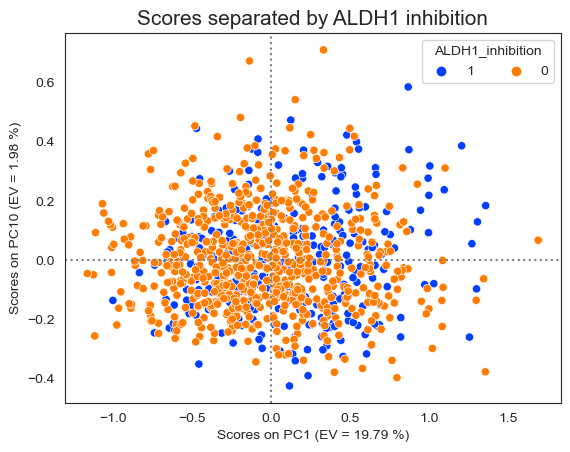

In [30]:
plot_scores(label= 'ALDH1_inhibition', PC_1= 0 , PC_2 = 10)

plt.xlabel('Scores on PC1 (EV = 19.79 %)')
plt.ylabel('Scores on PC10 (EV = 1.98 %)')
plt.title('Scores separated by ALDH1 inhibition', fontsize=15)